In [1]:
import time
import ftplib
import os
import sys
from datetime import datetime, timedelta
from sys import platform
import subprocess
import logging
import traceback
from pathlib import Path
from azure.storage.file import FileService
from azure.storage.file import ContentSettings

import pandas as pd
from pybufrkit.decoder import Decoder
import numpy as np
from geopandas.tools import sjoin
import geopandas as gpd
import json
import requests
from fiona.crs import from_epsg
from shapely.geometry import Point, Polygon, MultiPolygon, box


from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
    train_test_split,
    KFold)
 
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error,
    recall_score,
    f1_score,
    precision_score,
    confusion_matrix,
    make_scorer)

import xgboost as xgb
import glob
path=os.getcwd()
os.chdir('./src')

In [2]:
from climada.hazard import Centroids, TropCyclone,TCTracks
from climada.hazard.tc_tracks_forecast import TCForecast
from typhoonmodel.utility_fun import track_data_clean, Check_for_active_typhoon, Sendemail, ucl_data, plot_intensity, initialize

if platform == "linux" or platform == "linux2": #check if running on linux or windows os
    from typhoonmodel.utility_fun import Rainfall_data
elif platform == "win32":
    from typhoonmodel.utility_fun import Rainfall_data_window as Rainfall_data
from typhoonmodel.utility_fun.forecast_process import Forecast

decoder = Decoder()
from climada.util import coordinates  
from typhoonmodel.utility_fun.settings import *
from typhoonmodel.utility_fun.dynamicDataDb import DatabaseManager

from climada.util import coordinates 

initialize.setup_logger()
logger = logging.getLogger(__name__)



c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\dask\dataframe\backends.py:189: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\dask\dataframe\backends.py:189: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\dask\dataframe\backends.py:189: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
c:\Users\ATeklesadik\Miniconda3

No environment variables found.


In [3]:
os.chdir(path)

In [4]:
os.getcwd()

'c:\\Users\\ATeklesadik\\OneDrive - Rode Kruis\\Documents\\documents\\IBF_TYPHOON_DATA_PIPELINE\\IBF-Typhoon-model'

In [5]:
 
initialize.setup_cartopy()
start_time = datetime.now()
############## Defult variables which will be updated if a typhoon is active 
print('---------------------AUTOMATION SCRIPT STARTED---------------------------------')
print(str(start_time))

for countryCodeISO3 in countryCodes:
    logger.info(f"running piepline for {countryCodeISO3}")  
    admin_level=SETTINGS_SECRET[countryCodeISO3]["admin_level"]
    mock=SETTINGS_SECRET[countryCodeISO3]["mock"]
    mock_nontrigger_typhoon_event=SETTINGS_SECRET[countryCodeISO3]["mock_nontrigger_typhoon_event"]
    mock_trigger_typhoon_event=SETTINGS_SECRET[countryCodeISO3]["mock_trigger_typhoon_event"]
    mock_trigger=SETTINGS_SECRET[countryCodeISO3]["if_mock_trigger"]


2022-08-26 10:19:14,507 : INFO : running piepline for PHL


---------------------AUTOMATION SCRIPT STARTED---------------------------------
2022-08-26 10:19:14.506169


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:19:26,856 : INFO : Downloading ECMWF typhoon tracks


2022-08-26 10:19:28,051 - climada.hazard.tc_tracks_forecast - INFO - Fetching BUFR tracks:


Processing:   0%|          | 0/45 [00:00<?, ?files/s]2022-08-26 10:19:38,418 : INFO : Configure Section 0 of edition default
2022-08-26 10:19:38,419 : INFO : Configure Section 1 of edition 4
2022-08-26 10:19:38,422 : INFO : Configure Section 2 of edition 4
2022-08-26 10:19:38,424 : INFO : Configure Section 3 of edition 4
2022-08-26 10:19:38,425 : INFO : Configure Section 4 of edition 4
2022-08-26 10:19:38,778 : INFO : Configure Section 5 of edition 4
Processing:   2%|▏         | 1/45 [00:00<00:20,  2.11files/s]2022-08-26 10:19:38,880 : INFO : Configure Section 0 of edition default
2022-08-26 10:19:38,881 : INFO : Configure Section 1 of edition 4
2022-08-26 10:19:38,883 : INFO : Configure Section 2 of edition 4
2022-08-26 10:19:38,884 : INFO : Configure Section 3 of edition 4
2022-08-26 10:19:38,886 : INFO : Configure Section 4 of edition 4
2022-08-26 10:19:40,225 : INFO : Configure Section 5 of edition 4
Processing:   4%|▍         | 2/45 [00:02<01:02,  1.45s/files]2022-08-26 10:19:41,0

https://nomads.ncep.noaa.gov/pub/data/nccf/com/naefs/prod/gefs.20220826/00/prcp_bc_gb2/geprcp.t00z.pgrb2a.0p50.bc_24hf024
wget -O forecast\Input\rainfall\geprcp.t18z.pgrb2a.0p50.bc_24hf024.grib2 https://nomads.ncep.noaa.gov/pub/data/nccf/com/naefs/prod/gefs.20220825/18/prcp_bc_gb2/geprcp.t18z.pgrb2a.0p50.bc_24hf024
wget -O forecast\Input\rainfall\geprcp.t18z.pgrb2a.0p50.bc_24hf030.grib2 https://nomads.ncep.noaa.gov/pub/data/nccf/com/naefs/prod/gefs.20220825/18/prcp_bc_gb2/geprcp.t18z.pgrb2a.0p50.bc_24hf030
wget -O forecast\Input\rainfall\geprcp.t18z.pgrb2a.0p50.bc_24hf036.grib2 https://nomads.ncep.noaa.gov/pub/data/nccf/com/naefs/prod/gefs.20220825/18/prcp_bc_gb2/geprcp.t18z.pgrb2a.0p50.bc_24hf036
wget -O forecast\Input\rainfall\geprcp.t18z.pgrb2a.0p50.bc_24hf042.grib2 https://nomads.ncep.noaa.gov/pub/data/nccf/com/naefs/prod/gefs.20220825/18/prcp_bc_gb2/geprcp.t18z.pgrb2a.0p50.bc_24hf042
wget -O forecast\Input\rainfall\geprcp.t18z.pgrb2a.0p50.bc_24hf048.grib2 https://nomads.ncep.noaa.

2022-08-26 10:23:44,844 : WARNING : CPLE_AppDefined in Recode from UTF-8 to CP_ACP failed with the error: "Invalid argument".
2022-08-26 10:24:46,869 : WARNING : CPLE_AppDefined in Recode from UTF-8 to CP_ACP failed with the error: "Invalid argument".
2022-08-26 10:25:31,571 : INFO : Processing data 10W
2022-08-26 10:25:31,593 : INFO : High res member: creating intensity plot
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\Users\ATeklesadik\OneDrive - Rode Kruis\Documents\documents\IBF_TYPHOON_DATA_PIPELINE\IBF-Typhoon-model\src\typhoonmodel\utility_fun\forecast_process.py:462: UserWarning: CRS mismatch between the CRS of left geometries a

2022-08-26 10:25:34,853 - climada.hazard.centroids.centr - INFO - Convert centroids to GeoSeries of Point shapes.
2022-08-26 10:25:34,941 - climada.hazard.centroids.centr - DEBUG - Computing distance to coast for 47241 centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".

2022-08-26 10:25:35,637 - climada.util.coordinates - INFO - dist_to_coast: UTM 32650 (1/3)


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization me

2022-08-26 10:25:38,377 - climada.util.coordinates - INFO - dist_to_coast: UTM 32651 (2/3)


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization me

2022-08-26 10:25:45,590 - climada.util.coordinates - INFO - dist_to_coast: UTM 32652 (3/3)


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization me

2022-08-26 10:25:47,102 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30770 coastal centroids.
2022-08-26 10:25:49,150 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:25:49,151 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:25:59,042 : INFO : Running on ensemble # 2 for typhoon 10W


2022-08-26 10:25:59,072 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 28960 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:26:00,920 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:26:00,920 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:26:10,869 : INFO : Running on ensemble # 3 for typhoon 10W


2022-08-26 10:26:10,901 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30770 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:26:12,881 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:26:12,881 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:26:23,537 : INFO : Running on ensemble # 4 for typhoon 10W


2022-08-26 10:26:23,569 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 29684 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:26:25,434 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:26:25,435 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:26:35,399 : INFO : Running on ensemble # 5 for typhoon 10W


2022-08-26 10:26:35,430 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 31132 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:26:37,371 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:26:37,372 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:26:47,482 : INFO : Running on ensemble # 6 for typhoon 10W


2022-08-26 10:26:47,526 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 29684 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:26:49,409 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:26:49,410 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:26:59,467 : INFO : Running on ensemble # 7 for typhoon 10W


2022-08-26 10:26:59,498 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30770 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:27:01,446 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:27:01,447 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:27:11,918 : INFO : Running on ensemble # 8 for typhoon 10W


2022-08-26 10:27:11,953 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:27:13,851 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:27:13,852 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:27:24,243 : INFO : Running on ensemble # 9 for typhoon 10W


2022-08-26 10:27:24,273 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:27:26,135 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:27:26,136 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:27:36,274 : INFO : Running on ensemble # 10 for typhoon 10W


2022-08-26 10:27:36,306 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 31132 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:27:38,321 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:27:38,322 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:27:48,614 : INFO : Running on ensemble # 11 for typhoon 10W


2022-08-26 10:27:48,647 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 31132 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:27:50,634 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:27:50,634 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:28:01,179 : INFO : Running on ensemble # 12 for typhoon 10W


2022-08-26 10:28:01,210 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30770 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:28:03,171 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:28:03,171 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:28:13,272 : INFO : Running on ensemble # 13 for typhoon 10W


2022-08-26 10:28:13,305 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:28:15,195 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:28:15,195 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:28:25,414 : INFO : Running on ensemble # 14 for typhoon 10W


2022-08-26 10:28:25,445 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30770 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:28:27,397 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:28:27,397 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:28:37,571 : INFO : Running on ensemble # 15 for typhoon 10W


2022-08-26 10:28:37,605 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30770 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:28:39,532 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:28:39,534 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:28:49,947 : INFO : Running on ensemble # 16 for typhoon 10W


2022-08-26 10:28:49,979 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 29684 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:28:51,830 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:28:51,831 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:29:03,160 : INFO : Running on ensemble # 17 for typhoon 10W


2022-08-26 10:29:03,199 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:29:05,130 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:29:05,131 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:29:16,189 : INFO : Running on ensemble # 18 for typhoon 10W


2022-08-26 10:29:16,222 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:29:18,324 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:29:18,325 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:29:29,120 : INFO : Running on ensemble # 19 for typhoon 10W


2022-08-26 10:29:29,156 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 29684 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:29:31,121 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:29:31,123 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:29:46,251 : INFO : Running on ensemble # 20 for typhoon 10W


2022-08-26 10:29:46,293 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:29:48,347 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:29:48,348 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:29:58,830 : INFO : Running on ensemble # 21 for typhoon 10W


2022-08-26 10:29:58,864 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:30:01,260 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:30:01,261 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


2022-08-26 10:30:13,478 : INFO : Running on ensemble # 22 for typhoon 10W


2022-08-26 10:30:13,521 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:30:15,717 - climada.hazard.trop_cyclone - INFO - Progress: 100%


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:30:15,718 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


2022-08-26 10:30:27,668 : INFO : Running on ensemble # 23 for typhoon 10W


2022-08-26 10:30:27,701 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 29684 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:30:29,604 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:30:29,605 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:30:40,234 : INFO : Running on ensemble # 24 for typhoon 10W


2022-08-26 10:30:40,270 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30770 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:30:42,421 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:30:42,422 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:30:53,349 : INFO : Running on ensemble # 25 for typhoon 10W


2022-08-26 10:30:53,383 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 31132 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:30:55,342 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:30:55,343 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:31:05,951 : INFO : Running on ensemble # 26 for typhoon 10W


2022-08-26 10:31:05,990 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30770 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:31:08,007 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:31:08,008 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:31:18,711 : INFO : Running on ensemble # 27 for typhoon 10W


2022-08-26 10:31:18,744 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 31132 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:31:20,701 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:31:20,701 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:31:31,158 : INFO : Running on ensemble # 28 for typhoon 10W


2022-08-26 10:31:31,188 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 31132 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:31:33,177 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:31:33,179 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:31:43,796 : INFO : Running on ensemble # 29 for typhoon 10W


2022-08-26 10:31:43,828 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:31:45,701 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:31:45,702 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:31:55,789 : INFO : Running on ensemble # 30 for typhoon 10W


2022-08-26 10:31:55,821 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30770 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:31:57,752 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:31:57,753 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:32:08,165 : INFO : Running on ensemble # 31 for typhoon 10W


2022-08-26 10:32:08,198 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30770 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:32:10,220 - climada.hazard.trop_cyclone - INFO - Progress: 100%


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:32:10,221 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


2022-08-26 10:32:20,858 : INFO : Running on ensemble # 32 for typhoon 10W


2022-08-26 10:32:20,893 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:32:22,952 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:32:22,953 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:32:34,017 : INFO : Running on ensemble # 33 for typhoon 10W


2022-08-26 10:32:34,050 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 29684 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:32:35,929 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:32:35,930 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:32:46,150 : INFO : Running on ensemble # 34 for typhoon 10W


2022-08-26 10:32:46,183 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30770 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:32:48,153 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:32:48,153 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:32:58,723 : INFO : Running on ensemble # 35 for typhoon 10W


2022-08-26 10:32:58,756 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:33:00,591 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:33:00,592 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:33:10,693 : INFO : Running on ensemble # 36 for typhoon 10W


2022-08-26 10:33:10,722 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 29684 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:33:12,546 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:33:12,547 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:33:22,842 : INFO : Running on ensemble # 37 for typhoon 10W


2022-08-26 10:33:22,875 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30770 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:33:24,963 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:33:24,963 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:33:35,907 : INFO : Running on ensemble # 38 for typhoon 10W


2022-08-26 10:33:35,942 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:33:37,919 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:33:37,920 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:33:48,375 : INFO : Running on ensemble # 39 for typhoon 10W


2022-08-26 10:33:48,409 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:33:50,284 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:33:50,285 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:34:00,564 : INFO : Running on ensemble # 40 for typhoon 10W


2022-08-26 10:34:00,598 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30770 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:34:02,616 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:34:02,617 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:34:13,124 : INFO : Running on ensemble # 41 for typhoon 10W


2022-08-26 10:34:13,165 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:34:15,227 - climada.hazard.trop_cyclone - INFO - Progress: 100%


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:34:15,228 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


2022-08-26 10:34:26,324 : INFO : Running on ensemble # 42 for typhoon 10W


2022-08-26 10:34:26,355 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30770 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:34:28,321 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:34:28,321 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:34:38,812 : INFO : Running on ensemble # 43 for typhoon 10W


2022-08-26 10:34:38,846 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:34:40,743 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:34:40,743 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:34:51,163 : INFO : Running on ensemble # 44 for typhoon 10W


2022-08-26 10:34:51,194 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:34:53,192 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:34:53,193 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:35:04,105 : INFO : Running on ensemble # 45 for typhoon 10W


2022-08-26 10:35:04,142 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 29684 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:35:06,220 - climada.hazard.trop_cyclone - INFO - Progress: 100%


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:35:06,222 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


2022-08-26 10:35:17,307 : INFO : Running on ensemble # 46 for typhoon 10W


2022-08-26 10:35:17,343 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 29684 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:35:19,348 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:35:19,349 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:35:30,232 : INFO : Running on ensemble # 47 for typhoon 10W


2022-08-26 10:35:30,264 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:35:32,204 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:35:32,205 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:35:44,455 : INFO : Running on ensemble # 48 for typhoon 10W


2022-08-26 10:35:44,486 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:35:46,582 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:35:46,583 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:35:57,288 : INFO : Running on ensemble # 49 for typhoon 10W


2022-08-26 10:35:57,325 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30770 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:35:59,345 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:35:59,346 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:36:10,503 : INFO : Running on ensemble # 50 for typhoon 10W


2022-08-26 10:36:10,537 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 29684 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:36:12,472 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:36:12,472 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:36:23,565 : INFO : Running on ensemble # 51 for typhoon 10W


2022-08-26 10:36:23,600 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 30046 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:36:25,536 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:36:25,537 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
2022-08-26 10:36:36,772 : INFO : Running on ensemble # 52 for typhoon 10W


2022-08-26 10:36:36,804 - climada.hazard.trop_cyclone - INFO - Mapping 1 tracks to 31132 coastal centroids.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


2022-08-26 10:36:38,736 - climada.hazard.trop_cyclone - INFO - Progress: 100%
2022-08-26 10:36:38,737 - climada.hazard.trop_cyclone - DEBUG - Compute frequency.


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


[0]	validation_0-rmse:4.58980	validation_0-mean_absolute_error:1.00570	validation_1-rmse:3.90210	validation_1-mean_absolute_error:0.93044
[1]	validation_0-rmse:4.51132	validation_0-mean_absolute_error:0.98495	validation_1-rmse:3.83729	validation_1-mean_absolute_error:0.90978
[2]	validation_0-rmse:4.43312	validation_0-mean_absolute_error:0.96485	validation_1-rmse:3.77033	validation_1-mean_absolute_error:0.89011
[3]	validation_0-rmse:4.35617	validation_0-mean_absolute_error:0.94526	validation_1-rmse:3.70793	validation_1-mean_absolute_error:0.87125
[4]	validation_0-rmse:4.28541	validation_0-mean_absolute_error:0.92628	validation_1-rmse:3.64811	validation_1-mean_absolute_error:0.85243
[5]	validation_0-rmse:4.21799	validation_0-mean_absolute_error:0.90812	validation_1-rmse:3.58980	validation_1-mean_absolute_error:0.83481
[6]	validation_0-rmse:4.14888	validation_0-mean_absolute_error:0.89041	validation_1-rmse:3.53346	validation_1-mean_absolute_error:0.81737
[7]	validation_0-rmse:4.08050	vali

2022-08-26 10:36:53,869 : INFO : 535
2022-08-26 10:36:53,906 : INFO : CHECK LAND FALL TIME
2022-08-26 10:36:53,908 : INFO : CHECK LAND FALL TIME FINAL STEPLAT


2022-08-26 10:36:54,669 - climada.util.coordinates - INFO - dist_to_coast: UTM 32648 (1/4)


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization me

2022-08-26 10:36:54,974 - climada.util.coordinates - INFO - dist_to_coast: UTM 32649 (2/4)
2022-08-26 10:36:55,215 - climada.util.coordinates - INFO - dist_to_coast: UTM 32650 (3/4)


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2022-08-26 10:36:55,472 - climada.util.coordinates - INFO - dist_to_coast: UTM 32651 (4/4)


c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
2022-08-26 10:36:55,714 : INFO : CHECK LAND FALL TIME FINAL STEP 2022-08-23 09:00:00
2022-08-26 10:36:55,715 : INFO : CHECK LAND FALL TIME FINAL STEP 1 day, 3:00:00
2022-08-26 10:36:55,720 : INFO : 537
20

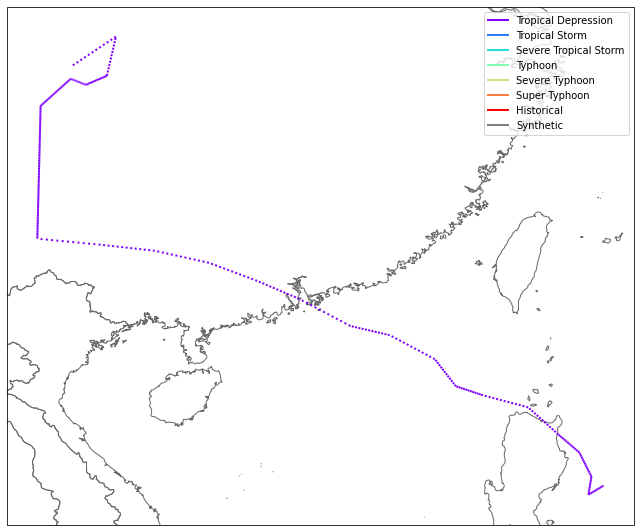

In [6]:
###############################################################
####  check setting for mock data 
if mock:
    if mock_trigger:
        typhoon_names=mock_trigger_typhoon_event
    else:
        typhoon_names=mock_nontrigger_typhoon_event                
    logger.info(f"mock piepline for typhoon{typhoon_names}")
    db = DatabaseManager(countryCodeISO3,admin_level)
    json_path = mock_data_path  + typhoon_names             
    db.uploadTrackData(json_path)            
    db.uploadTyphoonData(json_path)
    db.sendNotificationTyphoon()

else:
    fc = Forecast(ecmwf_remote_directory,countryCodeISO3, admin_level)
    
 


In [7]:
for typhoon_names in ['10W']:#fc.Activetyphoon:
    # upload data
    json_path = fc.Output_folder  + typhoon_names  
    EAP_TRIGGERED_bool=fc.eap_status_bool[typhoon_names]
    EAP_TRIGGERED=fc.eap_status[typhoon_names]                   
    fc.db.uploadTrackData(json_path)            
    fc.db.uploadTyphoonData(json_path) 
    #fc.db.sendNotificationTyphoon() 

2022-08-26 10:45:18,783 : INFO : Uploaded track_data: C:/Users/ATeklesadik/OneDrive - Rode Kruis/Documents/documents/IBF_TYPHOON_DATA_PIPELINE/IBF-Typhoon-model/forecast/Output/10W_tracks.json
2022-08-26 10:45:19,378 : INFO : Uploaded data for indicator: windspeed 
2022-08-26 10:45:19,915 : INFO : Uploaded data for indicator: rainfall 
2022-08-26 10:45:20,340 : INFO : Uploaded data for indicator: prob_within_50km 
2022-08-26 10:45:20,776 : INFO : Uploaded data for indicator: houses_affected 
2022-08-26 10:46:36,375 : INFO : Uploaded data for indicator: alert_threshold 
2022-08-26 10:46:36,988 : INFO : Uploaded data for indicator: show_admin_area 


In [16]:

for layer in ['HAZ_max_06h_rain',	'HAZ_rainfall_max_24h']:
    for ix, row in fc.rainfall_data.iterrows():
        exposure_entry = {"placeCode": row["adm3_pcode"], "amount": round(0.01*row[layer],7)}

In [17]:
exposure_entry

{'placeCode': 'PH012806000', 'amount': 0.061}

In [ ]:
for typhoon_names in ['10W']:#fc.Activetyphoon:
    # upload data
    json_path = fc.Output_folder  + typhoon_names  
    EAP_TRIGGERED_bool=fc.eap_status_bool[typhoon_names]
    EAP_TRIGGERED=fc.eap_status[typhoon_names]                   
    #fc.db.uploadTrackData(json_path)            
    fc.db.uploadTyphoonData(json_path) 
    #fc.db.sendNotificationTyphoon() 

In [ ]:
Active_Typhoon_event_list=[]

TropicalCycloneAdvisoryDomain_events=['g']
    
if  Active_Typhoon_event_list:
    Active_Typhoon_events=Active_Typhoon_event_list
else:
    Active_Typhoon_events=TropicalCycloneAdvisoryDomain_events
    
Active_Typhoon_events   

In [ ]:
fc.Activetyphoon

In [ ]:
###############################################################
####  check setting for mock data 
if mock:
    if mock_trigger:
        typhoon_names=mock_trigger_typhoon_event
    else:
        typhoon_names=mock_nontrigger_typhoon_event                
    logger.info(f"mock piepline for typhoon{typhoon_names}")
    db = DatabaseManager(countryCodeISO3,admin_level)
    json_path = mock_data_path  + typhoon_names             
    db.uploadTrackData(json_path)            
    db.uploadTyphoonData(json_path)
    db.sendNotificationTyphoon()

else:
    fc = Forecast(ecmwf_remote_directory,countryCodeISO3, admin_level)

    if fc.Activetyphoon: #if it is not empty   
        for typhoon_names in fc.Activetyphoon:
            # upload data
            json_path = fc.Output_folder  + typhoon_names  
            EAP_TRIGGERED_bool=fc.eap_status_bool[typhoon_names]
            EAP_TRIGGERED=fc.eap_status[typhoon_names]                   
            fc.db.uploadTrackData(json_path)            
            fc.db.uploadTyphoonData(json_path) 
            fc.db.sendNotificationTyphoon() 
            

    #if there is no active typhoon 
    else: #
        logger.info('no active Typhoon')
        df_total_upload=fc.pcode #data frame with pcodes 
        typhoon_names='null'
        df_total_upload['alert_threshold']=0
        df_total_upload['houses_affected']=0
        
        for layer in ["houses_affected","alert_threshold"]:
            exposure_entry=[]
            # prepare layer
            logger.info(f"preparing data for {layer}")
            exposure_data = {'countryCodeISO3': countryCodeISO3}
 
            exposure_place_codes = []
            #### change the data frame here to include impact
            for ix, row in df_total_upload.iterrows():
                exposure_entry = {"placeCode": row["adm3_pcode"],
                                    "amount": row[layer]}
                exposure_place_codes.append(exposure_entry)
                
            exposure_data["exposurePlaceCodes"] = exposure_place_codes
            exposure_data["adminLevel"] = admin_level
            exposure_data["leadTime"] = '72-hours'
            exposure_data["dynamicIndicator"] = layer
            exposure_data["disasterType"] = "typhoon"
            exposure_data["eventName"] = typhoon_names                     
            json_file_path = fc.Output_folder  + typhoon_names+ f'_{layer}' + '.json'
            with open(json_file_path, 'w') as fp:
                json.dump(exposure_data, fp)
            
        #upload typhoon data      
        json_path = fc.Output_folder  + typhoon_names
        fc.db.uploadTyphoonData_no_event()  
                    

print('---------------------AUTOMATION SCRIPT FINISHED---------------------------------')
print(str(datetime.now()))

In [ ]:
def set_zeros(x):
    x_max = 35
    y_max = 100
    v_max = x[0]
    rainfall_max = x[1]
    damage = x[2]
    Growth_factor=x[3]
    if pd.notnull(damage) and v_max > 20:
        value = damage/Growth_factor
    #elif v_max > x_max or rainfall_max > y_max:
    #    value = damage/Growth_factor
    elif v_max < 20:#np.sqrt((1 - (rainfall_max**2 / y_max*y_max)) * x_max**2):
        value = 0
    # elif ((v_max < x_max)  and  (rainfall_max_6h < y_max) ):
    # elif (v_max < x_max ):
    # value = 0
    else:
        value = np.nan
    return value

In [21]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
 
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [20]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
df.dropna(inplace=True)
df

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [ ]:
combined_input_data = pd.read_csv(ML_model_input)
 

In [ ]:
def model(df_total):
    from sklearn.model_selection import (
        GridSearchCV,
        RandomizedSearchCV,
        StratifiedKFold,
        train_test_split,
        KFold)
    from sklearn.metrics import (
        mean_absolute_error, 
        mean_squared_error,
        recall_score,
        f1_score,
        precision_score,
        confusion_matrix,
        make_scorer)
    from sklearn.inspection import permutation_importance
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

    from xgboost.sklearn import XGBRegressor
    import xgboost as xgb

    
    combined_input_data = pd.read_csv(ML_model_input)
    tphoon_events = (
        combined_input_data[["typhoon", "DAM_perc_dmg"]]
        .groupby("typhoon")
        .size()
        .to_dict()
    )
    
    # number of house used here is form 2015 need correction factor based on annual growth rate of 1.4%
    combined_input_data['year']=combined_input_data['typhoon'].apply(lambda x:x[-4:])

    Housing_unit_correction={'year':['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'],
                            'facor':[0.88,0.89,0.91,0.92,0.93,0.95,0.96,0.97,0.99,1.00,1.01,1.03,1.04,1.06,1.07,1.09,1.10]}


    Housing_unit_correction=pd.DataFrame.from_dict(Housing_unit_correction)
    combined_input_data = pd.merge(combined_input_data, Housing_unit_correction,  how='left', left_on='year', right_on ='year')

    combined_input_data["DAM_perc_dmg"] = combined_input_data[["HAZ_v_max", "HAZ_rainfall_Total", "DAM_perc_dmg","facor"] ].apply(set_zeros, axis="columns")
    
    combined_input_data["HAZ_v_max_sq"]=combined_input_data["HAZ_v_max"].pow(2)
    df_total["HAZ_v_max_sq"]=df_total["HAZ_v_max"].pow(2)
    selected_features_xgb_regr = [
        "HAZ_v_max",
        #"HAZ_v_max_sq",
        #"HAZ_rainfall_max_24h", 
        'HAZ_rainfall_Total',           
        "HAZ_dis_track_min",
        "TOP_mean_slope",
        "TOP_mean_elevation_m",
        "TOP_ruggedness_stdev",
        "TOP_mean_ruggedness",
        "TOP_slope_stdev",
        "VUL_poverty_perc",
        "GEN_with_coast",
        "VUL_Housing_Units",
        "VUL_StrongRoof_StrongWall",
        "VUL_StrongRoof_LightWall",
        "VUL_StrongRoof_SalvageWall",
        "VUL_LightRoof_StrongWall",
        "VUL_LightRoof_LightWall",
        "VUL_SalvagedRoof_StrongWall",
        "VUL_SalvagedRoof_LightWall",
        "VUL_SalvagedRoof_SalvageWall",
        "VUL_vulnerable_groups",
        "VUL_pantawid_pamilya_beneficiary",
    ]

    # split data into train and test sets

    SEED2 = 314159265
    SEED = 31

    test_size = 0.1

    # Full dataset for feature selection

    combined_input_data_ = combined_input_data[
        combined_input_data["DAM_perc_dmg"].notnull()
    ]

    X = combined_input_data_[selected_features_xgb_regr]
    y = combined_input_data_["DAM_perc_dmg"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=SEED
    )
    # from sklearn.metrics import mean_absolute_error
    reg = xgb.XGBRegressor(
        base_score=0.5,
        booster="gbtree",
        subsample=0.8,
        eta=0.05,
        max_depth=8,
        colsample_bylevel=1,
        colsample_bynode=1,
        colsample_bytree=1,
        early_stopping_rounds=10,
        eval_metric=mean_absolute_error,
        gamma=1,
        objective="reg:squarederror",
        gpu_id=-1,
        grow_policy="depthwise",
        learning_rate=0.025,
        min_child_weight=1,
        n_estimators=100,
        random_state=42,
        tree_method="hist",
    )

    eval_set = [(X_train, y_train), (X_test, y_test)]
    from matplotlib import pyplot
    from xgboost import plot_importance

    reg.fit(X, y, eval_set=eval_set)
    plot_importance(reg)
    pyplot.show()
    X_all = df_total[selected_features_xgb_regr]
    y_pred = reg.predict(X_all)
    y_pred1 = reg.predict(X)
    df_total['Damage_predicted']=y_pred
    combined_input_data_['Damage_predicted']=y_pred1
    df_total.loc[df_total['HAZ_dis_track_min'] > 150, 'Damage_predicted'] = 0
    
    return df_total#.filter(["Damage_predicted", "Mun_Code", "storm_id", "HAZ_dis_track_min","HAZ_v_max","is_ensamble"])

In [ ]:
pre_disaster_inds = pd.read_csv(PRE_DISASTER_INDICATORS)
pre_disaster_inds["vulnerable_groups"] = (
    pre_disaster_inds["vulnerable_groups"]
    .div(0.01 * pre_disaster_inds["Total Pop"], axis=0)
    .values
)
pre_disaster_inds["pantawid_pamilya_beneficiary"] = (
    pre_disaster_inds["pantawid_total_pop"]
    .div(0.01 * pre_disaster_inds["Total Pop"], axis=0)
    .values
)
pre_disaster_inds.rename(
    columns={
        "landslide_per": "GEN_landslide_per",
        "stormsurge_per": "GEN_stormsurge_per",
        "Bu_p_inSSA": "GEN_Bu_p_inSSA",
        "Bu_p_LS": "GEN_Bu_p_LS",
        "Red_per_LSbldg": "GEN_Red_per_LSbldg",
        "Or_per_LSblg": "GEN_Or_per_LSblg",
        "Yel_per_LSSAb": "GEN_Yel_per_LSSAb",
        "RED_per_SSAbldg": "GEN_RED_per_SSAbldg",
        "OR_per_SSAbldg": "GEN_OR_per_SSAbldg",
        "Yellow_per_LSbl": "GEN_Yellow_per_LSbl",
        "mean_slope": "TOP_mean_slope",
        "mean_elevation_m": "TOP_mean_elevation_m",
        "ruggedness_stdev": "TOP_ruggedness_stdev",
        "mean_ruggedness": "TOP_mean_ruggedness",
        "slope_stdev": "TOP_slope_stdev",
        "poverty_perc": "VUL_poverty_perc",
        "with_coast": "GEN_with_coast",
        "coast_length": "GEN_coast_length",
        "Housing Units": "VUL_Housing_Units",
        "Strong Roof/Strong Wall": "VUL_StrongRoof_StrongWall",
        "Strong Roof/Light Wall": "VUL_StrongRoof_LightWall",
        "Strong Roof/Salvage Wall": "VUL_StrongRoof_SalvageWall",
        "Light Roof/Strong Wall": "VUL_LightRoof_StrongWall",
        "Light Roof/Light Wall": "VUL_LightRoof_LightWall",
        "Light Roof/Salvage Wall": "VUL_LightRoof_SalvageWall",
        "Salvaged Roof/Strong Wall": "VUL_SalvagedRoof_StrongWall",
        "Salvaged Roof/Light Wall": "VUL_SalvagedRoof_LightWall",
        "Salvaged Roof/Salvage Wall": "VUL_SalvagedRoof_SalvageWall",
        "vulnerable_groups": "VUL_vulnerable_groups",
        "pantawid_pamilya_beneficiary": "VUL_pantawid_pamilya_beneficiary",
    },
    inplace=True,
)
 